# $\chi ^2$ Fitting

Definition of $\chi^2$:

There are many definitions (variations) of $\chi^2$ depending on how you'll be using it. For now, we define it as:
\begin{equation}
\chi^{2}=\sum_{i=1}^{n} \frac{\left(O_{i}-E_{i}\right)^{2}}{N}
\end{equation}

where $O_i$ is the observation, for you this is the target value, or experimental value, and $E_i$ is the expectation value, or the theory prediction (calculated from equation). Usually you'd sum it up over all the data points you have (or all the data points after some filtering), and divide it by the total number of data points you used for normalization.

In short, $\chi^2$ represents the overall goodness of prediction (theory calculation) on a given set of data points, the smaller the $\chi^2$, the better the theory (in general).

The $\chi^2$ fitting we'll be doing is then finding the coeficient, or a set of coeficients if you have a more complicated equation, that gives you the smallest $\chi^2$ value.

$\chi^2$ fitting is a naive but intuitive method of finding the best coeficient (fitting), it's the least efficient method, the idea is to test every possible combination of coeficients, then by locating the minimum $\chi^2$ you'll know which set is the best.

Before starting the fit, you'll need to determine 2 things:

1. Ranges of the coeficients you want to search,
2. The step size (gap) of the potential coeficients.

In the naive implementation, the range is basically a good guess of where your coeficient would lie, in the R vs $A^{1/3}$ example, the coeficient is around 1.2, so maybe you'd start a search from 0.5 to 2, rather than searching from -100000 to 100000, you can do this, but it'll waste a lot of computation and time. When you're not sure, you can always expand your search range.

The step size should be determined by how precise you want your theory to be, it's the gap between the coeficients you test out, eg. [1.21, 1.22, 1.23, 1.24, ... ] has a step size of 0.01. Note that decreasing the gap between coeficients would increase the number of searches, thus increasing your computation and time. You know you've reached a good step size when as you further decrease the step size the $\chi^2$ value doesn't seem to decrease much (reaching convergence). 

For eg. if you used a step size of 0.001 for the coeficient of R vs $A^{1/3}$ example, the $\chi^2$ is 70, if you use 0.00001 (100 times smaller, thus 100 times more computation), you get a $\chi^2$ of 68, you might say 0.001 is enough for now. Apart from determining the step size using this observation, sometimes you know your theory model is crude, and you don't need the coeficient to be that accurate, you'd also use a moderate step size. In the R vs $A^{1/3}$ example, now you know you're missing a neutron number dependence term, so no matter how precise your first coeficient is, you'll get a big deviation from the experimental radius, so maybe you don't want to spend too much computational resource on getting the BEST coeficient, when your theory model isn't even accurate in the first place.



Here's an example for fitting a quadratic equation: $y$ = 2.7 $x^2$ - 5.5 $x$ + 9

First we generate 20 points around this curve, but we add a little random noise to simulate fluctuations common to experimental measurements.

Number of data points: 21


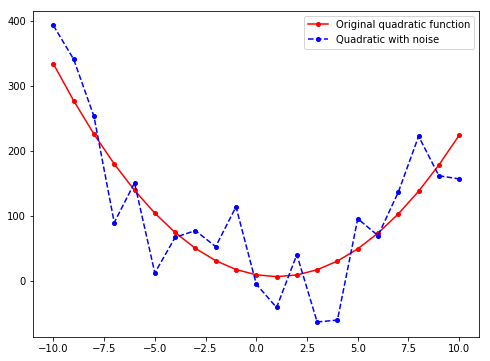

In [70]:
import numpy as np
import matplotlib.pyplot as plt
quad_x = list(range(-10,11))
quad_y = [2.7*x**2 - 5.5*x + 9 for x in quad_x]
quad_y_noise = [y + 200*(np.random.random()-0.5) for y in quad_y]

print ("Number of data points:", len(quad_x))

plt.figure(figsize=(8,6))
plt.plot(quad_x, quad_y, "r-",marker = 'o',ms=4,label="Original quadratic function")
plt.plot(quad_x,quad_y_noise, 'b--', marker = 'o', ms=4,label="Quadratic with noise")
plt.legend()
plt.show()


Now we'll use quad_x and quad_y_noise as our input, and we'll try to fit the formula in the form of:

$y = A x^2 + B x + C$

where there's 3 variables, so the brute force (direct) way of doing the $\chi^2$ fit is to have 3 layers of for loops, one for each variable.

A, B, C values that generates the smallest chi^2 is : 2.9 -6.6 5.0

Evolution of chi^2 value within the for loop:


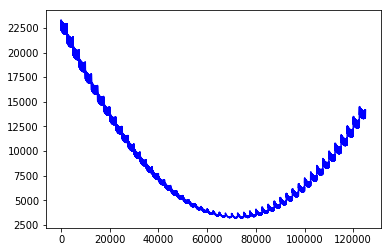

In [71]:
# Make sure you run the code cell above, otherwise the quad_x and quad_y_noise lists are non-existent here.

# Step 1. Make guesses for the range to search for variables A, B, C.
# You can either make a guess by manually pre-fitting the data points, or throw in a large range if you have 
# the time and resources.

# Step 2. Decide what kind of accuracy (step size) is needed for these variables, you can always come back and 
# increase the accuracy if you think the previous decision wasn't enough.

# Note that range() only deals with integer step sizes, you'd want to use np.arange() for float step sizes.

def y_calc(A,B,C,x):
    return A*x**2 + B*x + C

# Initialize to infinity, we'll use this variable to store the smallest value of chi^2 we've encountered so far
min_chi2 = float("Inf") 

chi2_history = []

# We store our final A,B,C value inside these 3 variables
final_A, final_B, final_C = 0,0,0

for A in np.arange(0,5,0.1):
    for B in np.arange(-10,-5,0.1):
        for C in np.arange(5,10,0.1):
            # Here, you'll have all the distinct values of A,B,C tested
            # You need to start summing the chi^2 from 0 for every set of A,B,C
            chi2 = 0
            # To compute the chi^2, you'll need another loop that go over all the x data points in quad_x
            for i in range(len(quad_x)):
                x = quad_x[i]
                y = quad_y_noise[i]
                chi2 += (y_calc(A,B,C,x)-y)**2
            # At this line in the code, the for loop of x has gone through all the x values in quad_x
            # So the accumulation for the numerator of chi^2 is complete, now we only need to divide it by
            # the number of data points
            chi2 = chi2 / len(quad_x)
            chi2_history.append(chi2)
            
            # Now, you know the previous smallest chi^2 value is stored in min_chi2, compare the current chi^2
            # to this value, if the current chi^2 is even smaller, update the min_chi2 and 
            # final_A,final_B,final_C
            if chi2 < min_chi2:
                min_chi2 = chi2
                final_A, final_B, final_C = round(A,1), round(B,1), round(C,1)

# At this point, you have checked all the possible combinations of A,B,C, which is a lot,
# how many combinations are there?

print (r"A, B, C values that generates the smallest chi^2 is :",final_A, final_B, final_C)

print ("\nEvolution of chi^2 value within the for loop:")

plt.plot(list(range(len(chi2_history))), chi2_history, "b-")
plt.show()


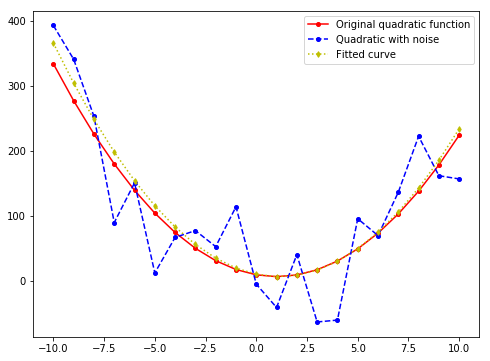

In [72]:
quad_y_fitted = [final_A * x**2 + final_B * x + C for x in quad_x]

plt.figure(figsize=(8,6))
plt.plot(quad_x, quad_y, "r-",marker = 'o',ms=4,label="Original quadratic function")
plt.plot(quad_x,quad_y_noise, 'b--', marker = 'o', ms=4,label="Quadratic with noise")
plt.plot(quad_x,quad_y_fitted, 'y:', marker = 'd', ms=4,label="Fitted curve")
plt.legend()
plt.show()



Because we introduced noise, the coeficients aren't exact, but you can see that it's close.  $\chi^2$ fitting works when there's only a small number of sets of coeficients to try out, you can try increasing the range or decreasing the step size of the above code and see how it effects the running time.

There are more efficient methods for fitting (or optimization), many are based on gradient (steepest descent) methods, everytime you make a decision to vary the coeficients for the next step, you choose the multidimentional direction that has the steepest slope, ie. the direction of the gradient.

Of course nowadays almost all common functionalities are already packed into libraries, for simple polynomial fits, you can use np.polyfit(): https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

In [75]:
np_A,np_B,np_C = np.polyfit(quad_x, quad_y_noise, deg=2)
print (np_A,np_B,np_C)

2.9229096400576093 -6.5932372749925925 0.45856381927985845


Simple as that, did you realize how fast this is? Do you think you can get this kind of precision in $\chi^2$ fitting in a reasonable amount of time? Notice that the results is exactly the same as the $\chi^2$ fit, up to the precision you defined (through step size).

### ? Exercise

1. You can now apply the $\chi^2$ fitting technique to the radius project, first try to determine the coeficient using one for loop, you can then use double layered for loop to vary the power of $A^p$, maybe something other than $\frac{1}{3}$ works better. Use 0.1 as step sizes for both the coeficient and power of A.


2. Add a $c_2*(\frac{N-Z}{A})^{p}$ term and vary its powers and coeficient. Note that every time there's a new coeficient to fit, there needs to be another layer of for loop, here you'll need at least 2 more layers, because if you want to have a difference power for the numerator (N-Z) and denominator A, ie. $\frac{(N-Z)^{p1}}{A^{p2}}$, you'll need 3 more layers of for loop. 

For the second task, use step size of 0.1 for the two multiplicative coeficients ($c_1$ for the original $A^p$ term, $c_2$ for the second term), use step size of $\frac{1}{3}$ for the powers related to $\frac{(N-Z)^{p1}}{A^{p2}}$, its optional to use different numbers for p1 and p2, you can opt to use the same powering and save yourself one loop layer.

In [ ]:
# Your code here:



For our binding energy project, we can try to use $\chi^2$ fit to find out the coeficients up to 2 decimal place, since this a multivariate formula, meaning there's not just polynomial terms of one variable, we'll need to resort to sklearn.linear_model.LinearRegression , we'll discuss this when the time comes.

#### Sidenote:

As you've probably realized by now, often times we can guess the form of the formulas by using analogies of other known physics system or good intuitions (which is really a combination of experience and knowledge and a bit of luck). However the history of theoretical physics is filled with failed guesses and models, you might think people who created the theory we use nowadays are geniuses (a few are), most of the times they are just lucky, or "standing on the shoulders of giants" by avoiding mistakes and wrong paths other physicist had already "wasted" their entire lives on.

A good theoretical physics model is more than just a "formula" that works, it needs to be tied with more fundamental physics, we don't want to just do model fitting, because overfitted model that seems to work perfectly on the current data, but lacks true physics at its core, are almost always bad at predicting unknown data. This is a little like developing stereotypes, while the truth is, the data you've seen so far is way less than the total data samples out there. In physics, the total data samples is often infinite, thus when developing a good theory, you'd always want to anchor it on more fundamental physics (proven to hold at the time you're using it).

Sometimes when we're studying a new physics system, we start from simple models without rigorous mathematical proof, because at that early stage, all we cared was to find something that works, and then improve on it.
This is the case of the radius forumla and the liquid drop model of binding energy, we call them phenomenological models, which are models that fits well with available data and had a good track record of predicting data. These models are usually based on physics intuitions (there couldn've been 100 ituitions but only this one works best and survived till now), such as assuming the nucleus is a sphere to derive the radius and mass relation, and assuming a nucleus has similar energy and geometry relation to that of a liquid droplet. 

Phenomenological models often appears in a new field or to describe a system that's way too complicated for the computer or mathematics we have today, this is also one of the reasons people were using the liquid drop model back in the 30s, because computer and software that can deal with more complex models such as the density functional model was barely invented 50 years later.
